In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


<h3>The goals of this project are...</h3>
<h3>* Visualize the distribution of the Netflix dataset</h3>
<h3>* Grasp insights to statistically analyzing it </h3>

In [2]:
#See the dataframe
df_overall = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Check the columns
df_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<h3>How are missing values distributed?</h3>

In [4]:
for column_name in df_overall.columns:
    df_overall[column_name] = df_overall[column_name].astype("str")

missing_values = {"show_id":0,"type":0,"title":0,
    "director":0,"cast":0,"country":0,"date_added":0,"release_year":0,"rating":0,"duration":0,"listed_in":0,"description":0}

for a in df_overall["show_id"]:
    if a == "nan":
       missing_values["show_id"] += 1
    else:
       continue 
    
for a in df_overall["type"]:
    if a == "nan":
       missing_values["type"] += 1
    else:
       continue 

for a in df_overall["title"]:
    if a == "nan":
       missing_values["title"] += 1
    else:
       continue 
    
for a in df_overall["director"]:
    if a == "nan":
       missing_values["director"] += 1
    else:
       continue      

for a in df_overall["country"]:
    if a == "nan":
       missing_values["country"] += 1
    else:
       continue      
#print("Country contains",country_nan,"missing values")

for a in df_overall["cast"]:
    if a == "nan":
       missing_values["cast"] += 1
    else:
       continue      
    
for a in df_overall["date_added"]:
    if a == "nan":
       missing_values["date_added"] += 1
    else:
       continue      
#print("Date_added contains",date_added_nan,"missing values")

for a in df_overall["release_year"]:
    if a == "nan":
      missing_values["release_year"] += 1
    else:
       continue 
    
for a in df_overall["rating"]:
    if a == "nan":
      missing_values["rating"] += 1
    else:
       continue      
#print("Rating contains",rating_nan,"missing values")
      
      
for a in df_overall["duration"]:
    if a == "nan":
      missing_values["duration"] += 1
    else:
       continue  

for a in df_overall["listed_in"]:
    if a == "nan":
      missing_values["listed_in"] += 1
    else:
       continue  

for a in df_overall["description"]:
    if a == "nan":
      missing_values["description"] += 1
    else:
       continue 

In [5]:
missing_values_df = pd.DataFrame.from_dict(missing_values,orient="index")
missing_values_df = missing_values_df.rename(columns={0:"missing_values out of 8807"})  
print(missing_values_df.sort_values(by="missing_values out of 8807",ascending=False))

              missing_values out of 8807
director                            2634
country                              831
cast                                 825
date_added                            10
rating                                 4
duration                               3
show_id                                0
type                                   0
title                                  0
release_year                           0
listed_in                              0
description                            0


<h3>What are the type of contents?</h3>

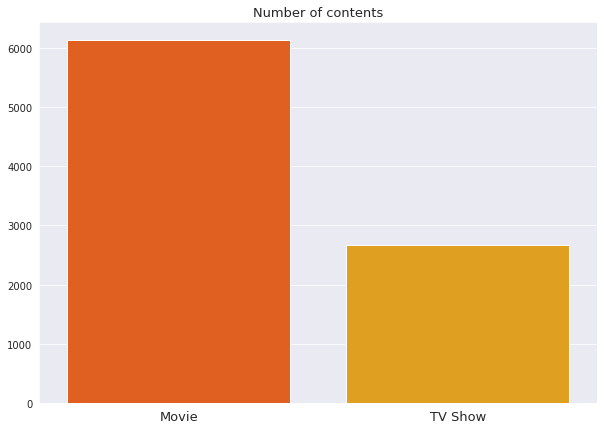

　　
6131 movies and 2676 TV shows


In [6]:
plt.figure(figsize=(10,7))
sns.set_style("darkgrid")
sns.countplot(x="type",data=df_overall,palette="autumn")
plt.xticks(fontsize=13)
plt.yticks(fontsize=10)
plt.title("Number of contents",fontsize=13)
plt.xlabel("")
plt.ylabel("")
plt.show()
movie = df_overall[df_overall["type"]=="Movie"]
show = df_overall[df_overall["type"]=="TV Show"]
print("　　\n{} movies and {} TV shows".format(movie.shape[0],show.shape[0]))

<h3>insight</h3>
<h3>💡Netflix has approximately twice larger number of movies than TV shows</h3>

<h3> Which country most produced movies/shows? </h3>


In [7]:
country_unique = []
country_count = 0
df_overall["country"] = df_overall["country"].astype("str")

for row in df_overall["country"]:
    country = row.split(",")
    for each in country:
        each = each.lstrip()
        if each not in country_unique:
            country_unique.append(each)
            country_count += 1
        else:
            continue     
        
print("The number of country is {}".format(country_count))

The number of country is 124


In [8]:
df_overall["country"] = df_overall["country"].astype("str")
country_list = []

for row in df_overall["country"]:
    country = row.split(",")
    for each in country:
        if each == "nan":
            continue
        else:
            each = each.lstrip()
            country_list.append(each)

country_movie_count = {}
for country in country_unique:
    country_movie_count[country] = country_list.count(country)


movies_per_country_df = pd.DataFrame(country_movie_count.items())
movies_per_country_df = movies_per_country_df.set_axis(["country","count"],axis='columns')
movies_per_country_df = movies_per_country_df.reset_index()

In [9]:
print(movies_per_country_df.sort_values(by="count",ascending=False).reset_index()[["country","count"]].head(10))
dict = {"United States":3690,"India":1046,"United Kingdom":806,"Canada":445,"France":393}
df = pd.DataFrame(dict.items())
df = df.set_axis(["country","count"],axis="columns")

          country  count
0   United States   3690
1           India   1046
2  United Kingdom    806
3          Canada    445
4          France    393
5           Japan    318
6           Spain    232
7     South Korea    231
8         Germany    226
9          Mexico    169


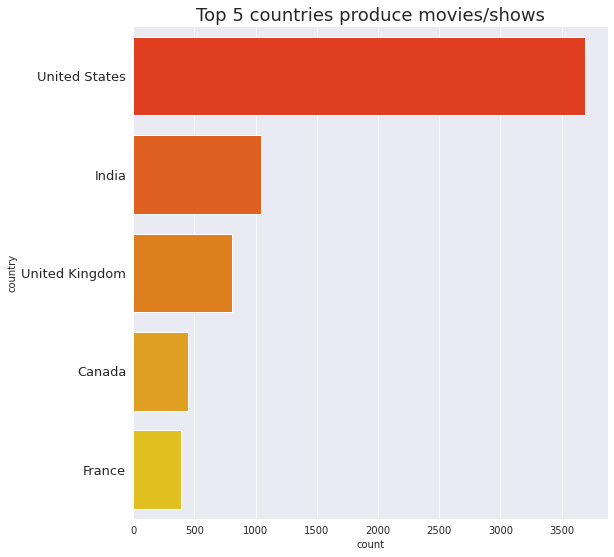

In [10]:
#plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
g = sns.catplot(y="country",x="count",data=df,kind="bar",palette="autumn")
g.fig.set_size_inches(10,8)
plt.xticks(fontsize=10)
plt.title("Top 5 countries produce movies/shows",fontsize=18)
plt.yticks(fontsize=13)
plt.show()

<h3>How are rating distributed?</h3>

In [11]:
df_overall["rating"].unique()
df_overall["rating"] = df_overall["rating"].replace({"PG-13":"Parents Strongly Cautioned","TV-MA":"Mature Audience Only","PG":"Parental Guidance Suggested",
                   "TV-14":"Parents Strongly Cautioned","TV-PG":"Parental Guidance Suggested","TV-Y":"All Children","TV-Y7":"Suitable for children 7 or older","TV-G":"Suitable for all audiences","R":"Restricted",
                    "G":"General Audience","NC-17":"No One 17 And Under Admitted","NR":"Not/Unrated","TV-Y7-FV":"Suitable for children", "suitable for children":"Suitable for children","UR":"Not/Unrated","Unrated":"Not/Unrated","74 min":"nan","84 min":"nan","66 min":"nan"})
#print(df_overall["rating"].unique())

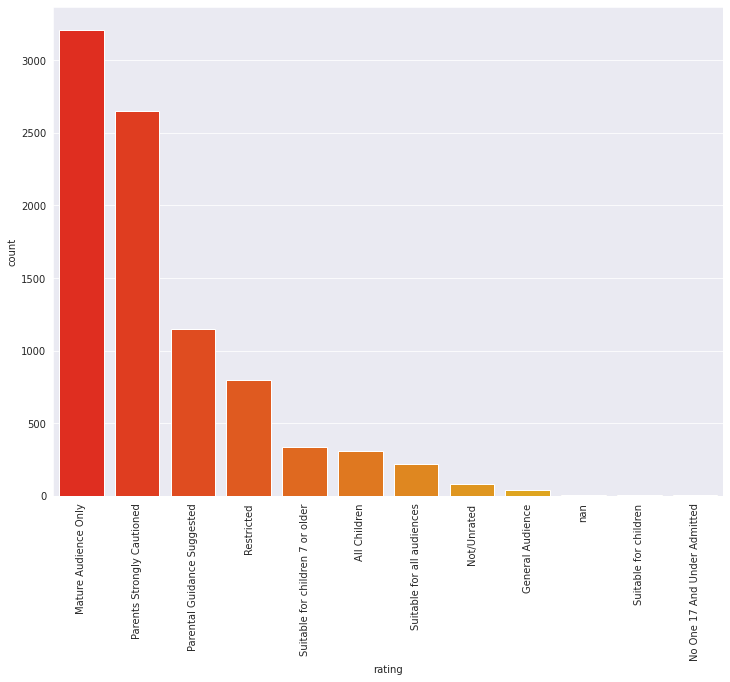

In [12]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
sns.countplot(x="rating",data=df_overall,palette="autumn",order=df_overall["rating"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

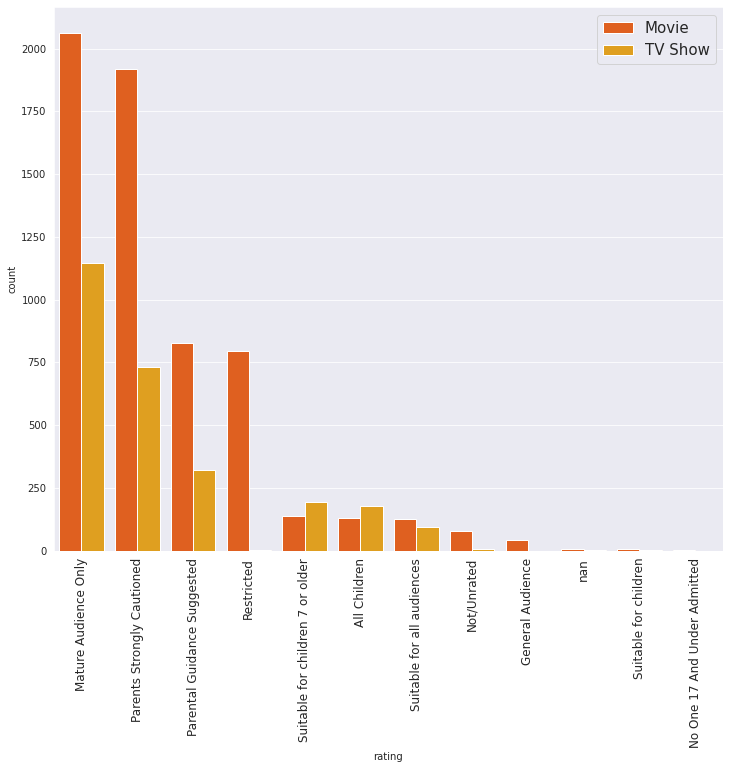

In [13]:
fig,ax = plt.subplots(figsize=(12,10))
fig = sns.countplot(x="rating", hue="type", data=df_overall,order=df_overall["rating"].value_counts().index,palette="autumn")
plt.xticks(rotation=90,fontsize=12)
plt.legend(loc="upper right",fontsize=15)
plt.show()

<h3>Hightlight</h3>
<h3>💡The majority of Netflix contents are rated as "Mature Audience Only" or "Parents Strongly Cautioned"</h3>
<h3>💡Contents rated as "Restricted" are exclusively movies though other rates seems to be in accord to the distribution of contents type(Movie and TV shows) </h3>

How durations are distributed?

In [14]:
duration_min = [] #Store durations that are expressed in minutes
duration_seasons = [] #Store durations that are expressed in seasons
duration_int = [] #Store durations that are expressed in minutes
for each in df_overall["duration"]:
    if "min" in each:
        stripped_each = each.strip("min")
        stripped_each = stripped_each.strip("")
        duration_min.append(stripped_each)
        duration_int.append(stripped_each)
    elif "Seasons" in each:
        stripped_each = each.strip("Seasons")
        stripped_each = stripped_each.strip("")
        duration_seasons.append(stripped_each)
        duration_int.append("nan")
    elif "Season" in each:
        stripped_each = each.strip("Season")
        stripped_each = stripped_each.strip("")
        duration_seasons.append(stripped_each)
        duration_int.append("nan")
    else:
        duration_int.append("nan")
        continue
duration_min = np.array(duration_min, dtype=np.int64)
df_overall["duration_int"] = duration_int

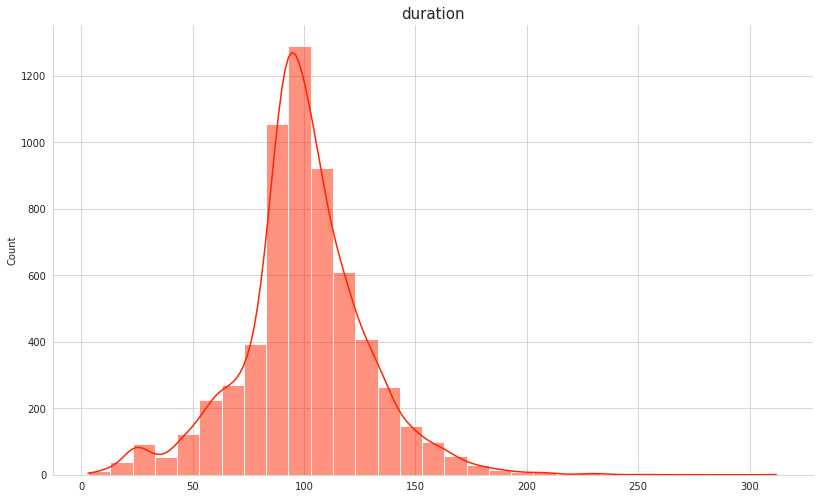

In [15]:
#Histogram of duration im minutes
binwidth=10
sns.set_style("whitegrid")
sns.set_palette("autumn")
fig = sns.displot(x=duration_min,bins=np.arange(min(duration_min), max(duration_min) + binwidth, binwidth),kde=True)
fig.fig.set_size_inches(13,7)
plt.title("duration",fontsize=15)
plt.show()
#print("bins",np.arange(min(duration_min), max(duration_min) + binwidth, binwidth))

<h3>Highlight</h3>
<h3>💡The center of the distribution is 93-100</h3>
<h3>💡The center is the distribution is relatively biased in left side, suggesting that there're more longer contents than shorter ones</h3>

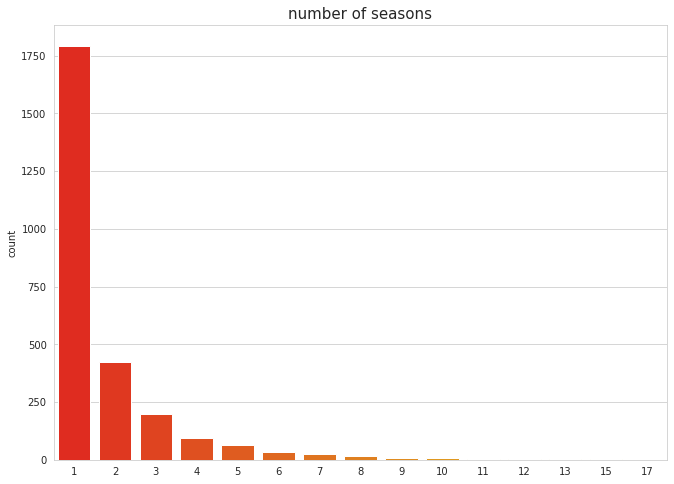

In [16]:
#Histogram of duration in season
duration_seasons = np.array(duration_seasons, dtype=np.int64)
plt.figure(figsize=[11,8])
sns.set_style("whitegrid")
sns.countplot(x=duration_seasons,palette="autumn",order= duration_seasons.sort())
plt.title("number of seasons",fontsize=15)
plt.show()

<h3>Highlight</h3>
<h3>💡Almost all the series last one-season</h3>

What are the most long-season contents?

Which countries most produce contents?

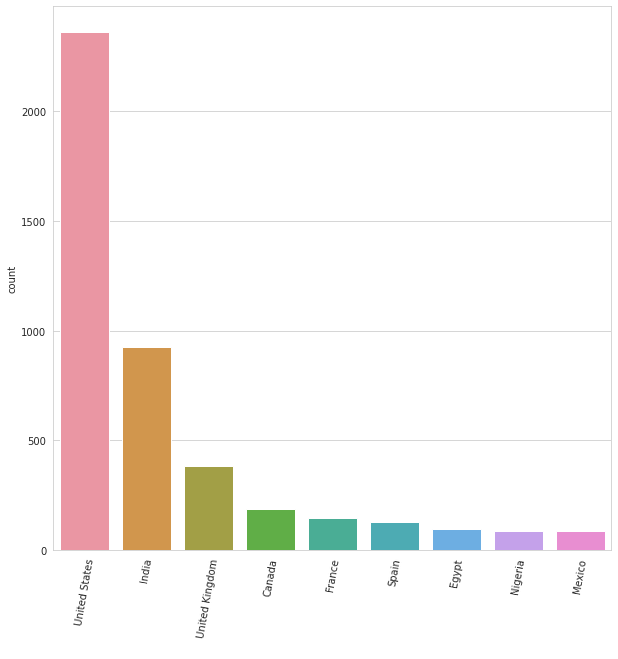

In [17]:
#Since "country" columns contain multipul countries in a cell, set the first country as the main producing one.
#It is reasonaable to suppose the first country as the one most contributed because there isn't regularity in the order of the countries at all.
first_country = []

for row in df_overall["country"]:
    try:
        countries = row.split(",")
        first_country.append(countries[0])
    except AttributeError:
        first_country.append("nan")
        continue
df_overall["first_country"] = first_country

df = df_overall[df_overall['duration_int'] != "nan"]
df = df.astype({"duration_int":int})
order = df.groupby(level=0)["title"].count().sort_values(ascending=False)
df = df.set_index("first_country")
df_top = df.loc[["United States","India","United Kingdom","Canada","France","Spain","Egypt","Nigeria","Mexico"],:]
#visualize
fig, ax = plt.subplots(figsize=[10,10])
sns.countplot(x=df_top.index)
plt.xlabel(" ")
plt.xticks(rotation=80)
plt.show()

<h3>Highlight</h3>
<h3>💡~~~~</h3>

Is there any unique traits to each top county?

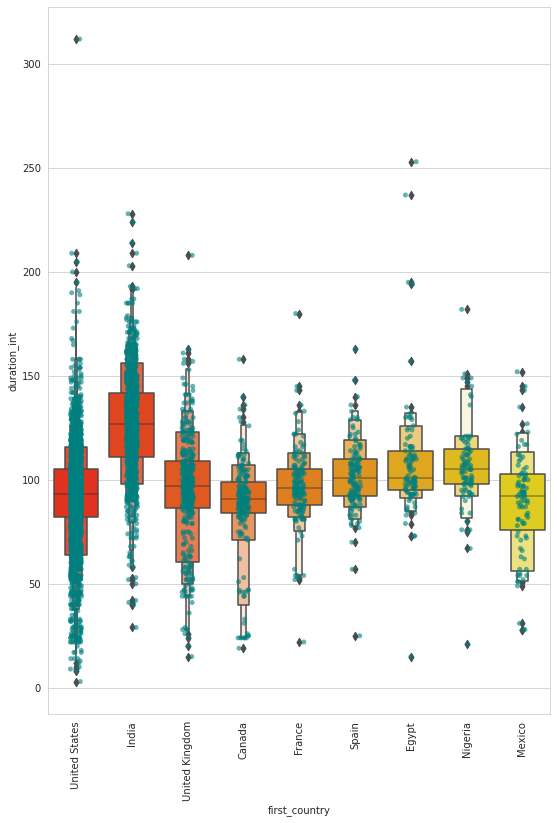

In [18]:
#Relation between a producing country and duration
#df = df.sort_index(key=order)
#df_top10 = df.loc[0:10]
fig,ax = plt.subplots(figsize=[9,13])
fig = sns.boxenplot(x=df_top.index,y=df_top["duration_int"],palette="autumn")
fig = sns.stripplot(x=df_top.index,y=df_top["duration_int"],color="#008080",alpha=0.6)
plt.xticks(rotation=90)
plt.show()

<h3>Highlight</h3>
<h3>💡~~</h3>

Distribution of release year

In [19]:
df_overall["release_year"] = df_overall["release_year"].astype("int")

In [20]:
df_date = df_overall.groupby("release_year")["title"].count().reset_index()
#print(df_overall)
fig = px.area(df_date, x='release_year',y="title")
fig.show()

<h3>Highlight</h3>
<h3>💡~~</h3>

In [21]:
#convert date_added to datetime objects
df_overall["date_added"] = df_overall["date_added"].replace({"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,
                                                             "July":7,"August":8,"September":9,"October":10,"November":11,"December":12})
df_overall["date_added"] = pd.to_datetime(df_overall["date_added"],infer_datetime_format=True)
    
    
df_overall["date_added_year"] =  df_overall["date_added"].dt.strftime('%Y')
df_overall["date_added_month"] =  df_overall["date_added"].dt.strftime('%m')
df_overall["date_added_day"] = df_overall["date_added"].dt.strftime('%d')


#for row in df_overall.iteritems():
    #row["date_added_year"] = int(row["date_added_year"])

#print(df_overall["date_added_month"])
#print(df_overall["date_added_day"])
#print(df_overall.head())

Distribution of added year

In [22]:
df_added_year = df_overall.groupby("date_added_year")[["title"]].count().reset_index()
fig = px.area(df_added_year, x="date_added_year",y="title")
fig.show()

<h3>Highlight</h3>
<h3>💡~~</h3>

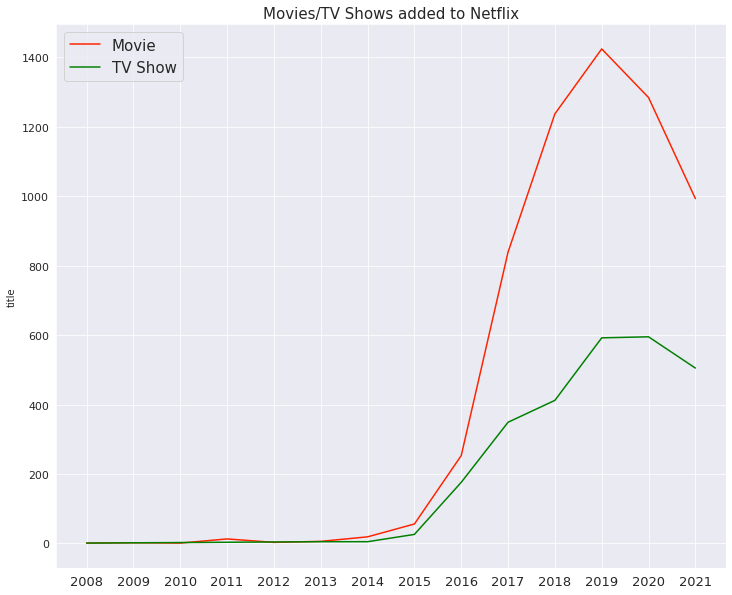

In [23]:
#TV show と moviesの増加を比較する
df_type_date = df_overall.groupby(["type","date_added_year"])[["title"]].count()
df_type_date_movie = df_type_date.loc["Movie",]
df_type_date_tv= df_type_date.loc["TV Show",]

fig = plt.figure(figsize=(12,10))
sns.set_style("darkgrid")
fig = sns.lineplot(x=df_type_date_movie.index,y=df_type_date_movie.title,palette="autumn")
fig = sns.lineplot(x=df_type_date_tv.index,y=df_type_date_tv.title,color="green")

plt.legend(["Movie","TV Show"],fontsize=15)
plt.xlabel(xlabel="")
plt.xticks(fontsize=13)
plt.yticks(fontsize=11)
plt.title("Movies/TV Shows added to Netflix",fontsize=15)
plt.show()

In [24]:
#date_added_yearとrelease_yearの差を求めて、violin plotにする

till_release = []
for index,each in df_overall.iterrows():
    till_release.append(float(each.date_added_year) - int(each.release_year))
    
df_overall["till_release"] = till_release

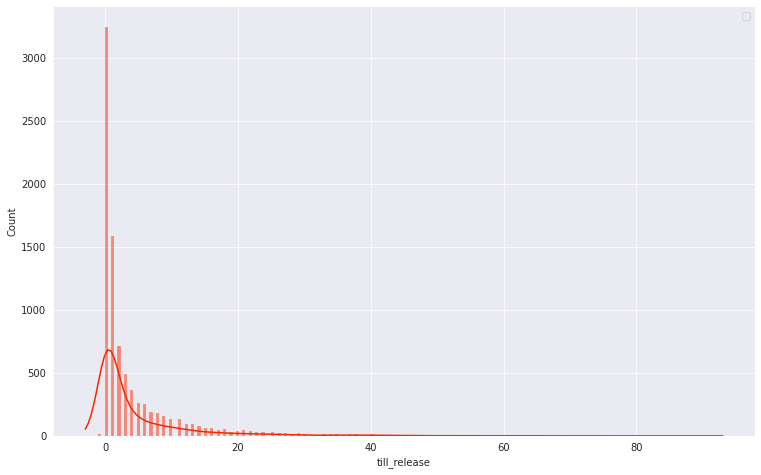

In [25]:
fig = sns.displot(x="till_release",data=df_overall,kde=True)
fig.fig.set_size_inches(12,7)
plt.xlim()
plt.xticks()
plt.legend(loc="upper right")
plt.show()

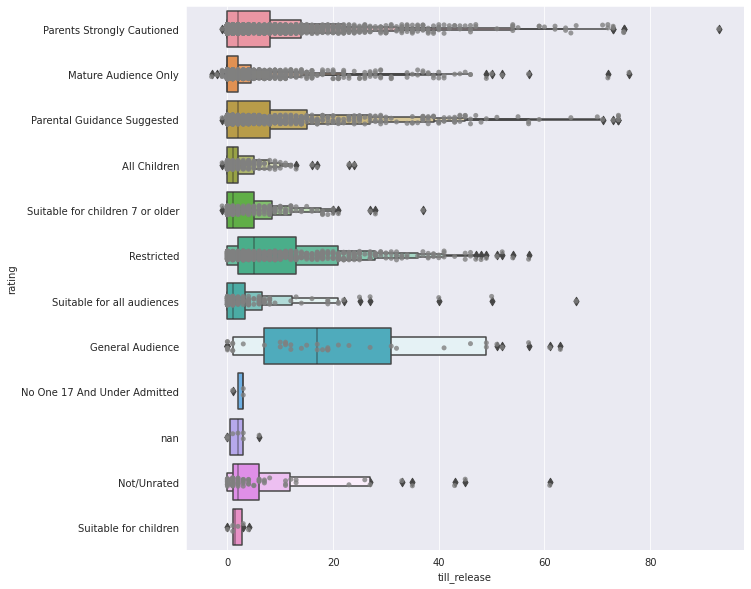

In [26]:
#relation between rating and years to adding to Netflix
fig = plt.subplots(figsize=[10,10])
sns.stripplot(x="till_release",y="rating",data=df_overall,alpha=0.8,color="#808080")
sns.boxenplot(x="till_release",y="rating",data=df_overall)
plt.show()

In [27]:
#x=曜日、y=月のtitle数をヒートマップで表す

#date_addedの曜日を取得する関数
def get_day_of_week(a):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    try:
        return(days[int(a)])
    except ValueError:
        return("nan")

date_added_weekday = []
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for datetime in df_overall["date_added"]:
    a = datetime.weekday()
    weekday = get_day_of_week(a)
    date_added_weekday.append(weekday)
df_overall["date_added_weekday"] = date_added_weekday

df = df_overall[~df_overall.isin({"date_added_weekday","nan"})]
df = df.groupby(by=["date_added_month","date_added_weekday"],as_index=False)["title"].count()
df = df.sort_index()
df = df.sort_values(by="title")
pivot = pd.pivot_table(data=df,values="title",index="date_added_weekday",columns="date_added_month")
pivot = pivot.loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

pivot.columns = ["January","February","March","April","May","June","July","August","September","October","November","December"]

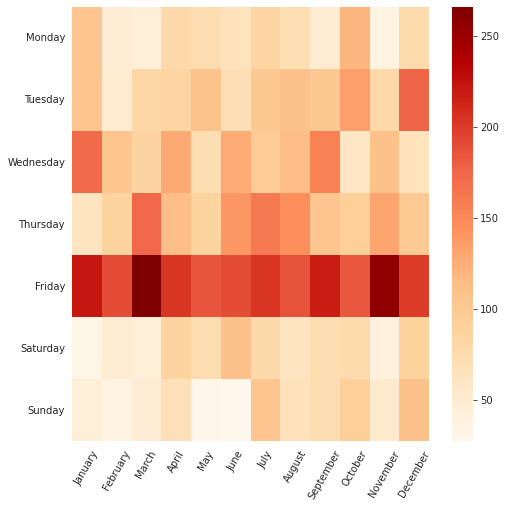

In [28]:
#x=曜日、y=月のtitle数をヒートマップで表す
plt.figure(figsize=[8,8])
sns.heatmap(pivot,cmap="OrRd")
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.show()

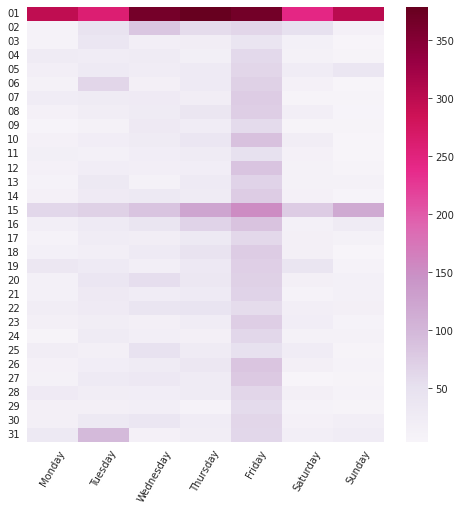

In [29]:
#x軸はweekday、y軸はday
df2 = df_overall[~df_overall.isin({"date_added_weekday","nan"})]
df2 = df2.groupby(by=["date_added_weekday","date_added_day"],as_index=False)["title"].count()
pivot2 = pd.pivot_table(data=df2,values="title",columns="date_added_weekday",index="date_added_day")
pivot2 = pivot2.loc[:,["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

plt.figure(figsize=[8,8])
sns.heatmap(pivot2,cmap="PuRd")
plt.xticks(rotation=60)
plt.yticks(rotation=0)
plt.xlabel("")
plt.ylabel("")
plt.show()
plt.show()

In [30]:
#どのリストが一番多い？
df_overall["listed_in"] = df_overall["listed_in"].astype("str")
list_list = []
list_unique = []

for row in df_overall["listed_in"]:
    _lists = row.split(",")
    for each in _lists:
        if each == "nan":
            continue
        else:
            each = each.lstrip()
            list_list.append(each)
            
for each in list_list:
    if each not in list_unique:
        list_unique.append(each)
    else:
        continue
#print(list_unique) 


#list_unique = list_list.unique
#for country in country_unique:
    #country_movie_count[country] = country_list.count(country)

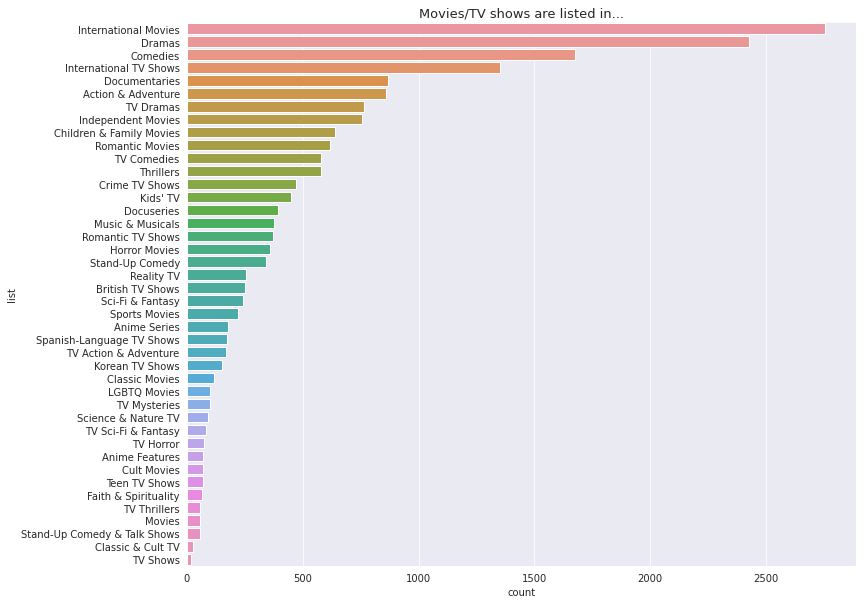

In [31]:
df_lists = pd.DataFrame(data=list_list,columns=["list"],index=list_list)
df_lists
fig, ax = plt.subplots(figsize=(12,10))
fig = sns.countplot(y="list",data=df_lists,order=df_lists["list"].value_counts().index)
plt.title("Movies/TV shows are listed in...",fontsize=13)
plt.show()